# MSE Module

### loading data frame from csv file

In [1]:
import pandas as pd
data = pd.read_csv('GOOGL.csv', index_col=0, header=0, parse_dates=True)
train = len(data) - 10
head = data.head(train)['Open'].to_numpy()


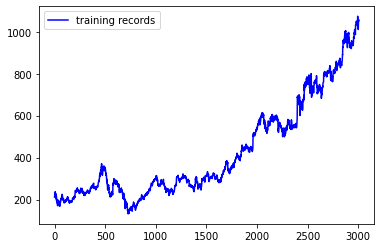

In [8]:
from matplotlib import pyplot as plt
plt.plot(head, color="blue", label="training records")
plt.legend()
plt.show()

### calculating coeffitients of 3 regression among head(training) records 
#### regression 1 linear model: b0 + b1x
#### regression 2 quadratic model: b0 + b1x + b2x^2
#### regression 3 linear-sinusoidial model: b0 + b1x + b2 sin(wx)
#### regression 4 exponential model: a0(a1^x) or exp(b0 + b1x) - b0=log(a0), b1=log(a1)

In [3]:
import numpy as np
import math as ma
from numpy import matrix as mt
from numpy import linalg as la
##
# domain = np.arange(1., train + 1, 1)
# head = 62+0.24*domain+100*np.sin(2 * ma.pi / 500 * domain)
reg_detail = {
    0:"linear(simple) regression",
    1:"quadratic regression",
    2:"linear-sinusoidal regression",
    3:"exponential regression"
}
## 
x_t = np.arange(1, train + 1, 1)
x_t = [x_t, np.copy(x_t), np.copy(x_t), np.copy(x_t)]
##
x_t[0] = np.array([np.ones(train), x_t[0]])
x_t[1] = np.array([np.ones(train), x_t[1], x_t[1]**2])
x_t[2] = np.array([np.ones(train), x_t[2], np.sin(2 * ma.pi / 500 * x_t[2])])
x_t[3] = np.array([np.ones(train), x_t[3]])
## calculation
product = [np.ones(train), np.ones(train), np.ones(train), np.ones(train)]
for i in range(4):
    product[i] = np.copy(x_t[i])
    product[i] = np.matmul(product[i], mt.transpose(product[i]))
    product[i] = la.inv(product[i])
    product[i] = np.matmul(product[i], x_t[i])
    product[i] = np.matmul(product[i],(np.log(mt.transpose(head)) if (i == 3)  else mt.transpose(head))) # exponential must fit the logarithm of records

In [4]:
product

[array([61.5171351 ,  0.24222584]),
 array([ 2.64768237e+02, -1.62791301e-01,  1.34557190e-04]),
 array([61.34845981,  0.24233778,  1.06837394]),
 array([5.09010161e+00, 5.49342235e-04])]

### plotting whole records and regression points through whole domain

In [5]:
domain = np.arange(1., train + 11, 1)
regression = np.array([np.copy(domain), np.copy(domain), np.copy(domain), np.copy(domain)])
regression[0] = product[0][0] + product[0][1] * (regression[0])
regression[1] = product[1][0] + product[1][1] * (regression[1]) + product[1][2] * (regression[1]**2) 
regression[2] = product[2][0] + product[2][1] * (regression[2]) + product[2][2] * np.sin(2 * ma.pi / 500 * (regression[2]))
regression[3] = np.exp(product[3][0] + product[3][1] * (regression[3]))

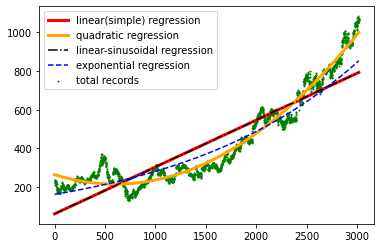

In [6]:
plt.plot(regression[0], color='red', linewidth=3, label=reg_detail[0])
plt.plot(regression[1], color='orange', linewidth=3, label=reg_detail[1])
plt.plot(regression[2], color='black', label=reg_detail[2], linestyle='-.')
plt.plot(regression[3], color='blue', label=reg_detail[3], linestyle='--')
plt.scatter(domain, data.head(train + 10)['Open'], color='green', s=1, label="total records")
# plt.scatter(domain, 62+0.24*domain+100*np.sin(2 * ma.pi / 500 * domain), color='green', s=2, label="total records")
plt.legend()
plt.show()

### calculating error of 10 tail records

############ linear(simple) regression ############
actual:1063.78, predicted:790.616916084636, error:-273.1630839153639

actual:1076.45, predicted:790.8591419254964, error:-285.59085807450367

actual:1083.02, predicted:791.1013677663566, error:-291.9186322336434

actual:1080.92, predicted:791.3435936072169, error:-289.57640639278316

actual:1075.39, predicted:791.5858194480772, error:-283.80418055192285

actual:1070.0, predicted:791.8280452889375, error:-278.17195471106254

actual:1068.64, predicted:792.0702711297978, error:-276.5697288702023

actual:1066.6, predicted:792.3124969706581, error:-274.2875030293418

actual:1062.25, predicted:792.5547228115183, error:-269.69527718848167

actual:1055.49, predicted:792.7969486523787, error:-262.69305134762135

total predication error:-2780
mean error:-278.0

############ quadratic regression ############
actual:1063.78, predicted:993.8680182227845, error:-69.91198177721549

actual:1076.45, predicted:994.515395762259, error:-81.93460423774104

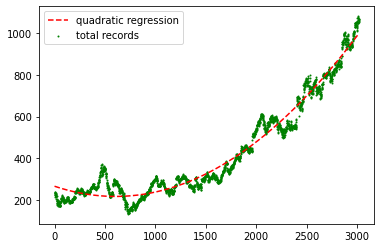

In [7]:
reg_flag = -1
min_er = 10**10
##
error = np.array([0, 0, 0, 0])
tail = data.tail(10)["Open"].to_list()
for k in range(4):
    print("############ " + reg_detail[k] + " ############")
    for i in range(10):
        predicted = regression[k][train + i]
        e = predicted - tail[i]
        print("actual:" + str(tail[i]) + ", predicted:" + str(predicted) + ", error:" + str(e) + "\n")
        error[k] += e
        ##
        if abs(min_er) >= abs(error[k]):
            min_er = error[k]
            reg_flag = k;
    print("total predication error:" + str(error[k]) + "\n" + "mean error:" + str(error[k]/10) + "\n")
###
print("best prediction by " +  reg_detail[reg_flag])
plt.plot(regression[reg_flag], color='red', linestyle="--"  , label=reg_detail[reg_flag])
plt.scatter(domain, data.head(train + 10)['Open'], color='green', s=1, label="total records")
plt.legend()
plt.show()
